# Gradient Descent

Gradient descent is the process iteratively updating the new weights by moving in some small change with respect to $\nabla w$. In many problems in machine learning our general goal is to find a set of parameters that give us optimal perforamance. And our goal is to do this intelligently, without doing a brute force search. As a result, we frame a lot of problems in terms of a differentiable loss function. This gives as a way to take its dirivative move in a direction that minimizes loss. Gradient descent is a very generic optimization function that is capable of finding solutions to a wide range of problems. This is what makes it such foundation topic in machine learning. There are also situations where gradient descent is favorable over other algorithms such as the normal equation because it scales well with the number of features.

## How does it work?

There are several versions of gradient descent, but in short, gradient descent applies the gradient of the cost function. The gradient just makes taking the partial derivative with respect to every dimension of the cost function. The result of doing this returns a gradient vector that actually points the direction opposite of local minimum. So in order to move in the direction toward the minimum, we subtract in that specific direction. In doing so, the algorithm will decend towards a local minimum for a cost function. 

$$w := w - \eta \nabla w$$

Here, $\eta$ is the learning rate, which is a parameter that makes the vector of $\nabla w$ bigger, resulting in "moving down the hill" less accurately, but in larger, much faster steps. To give a concrete demonstration of this, lets begin with a few examples.

Gradient descent is also sometimes called steepest descent, because it involves an iterative process in moving towards the steepest direction. In other words, the process is a first order iterative optimization technique (taking the first derivative with respect to every direction and then moving in the vector of that direction).


## Gradient Descent with a Simple Example

### 2-Dimension

Suppose we have the function $f(x) = x^2$

In [14]:
# %pip uninstall tools
%pip install /Users/danielm/Dropbox/software-projects/tools

Processing /Users/danielm/Dropbox/software-projects/tools
  Created wheel for tools: filename=tools-1.0.7-py3-none-any.whl size=66299 sha256=216d9d2836c24ab976d14ab4d67844ac872dfa6a1e6bd712543677339bbe0979
  Stored in directory: /private/var/folders/h9/dv0jms_565z78y9p4hbchdpr0000gp/T/pip-ephem-wheel-cache-bj47eooa/wheels/2b/c9/97/2bc5d6a56e649af08b35b41a14c82521a8b2249b32ebf972f0
Successfully built tools
  Attempting uninstall: tools
    Found existing installation: tools 1.0.6
    Uninstalling tools-1.0.6:
      Successfully uninstalled tools-1.0.6
Note: you may need to restart the kernel to use updated packages.


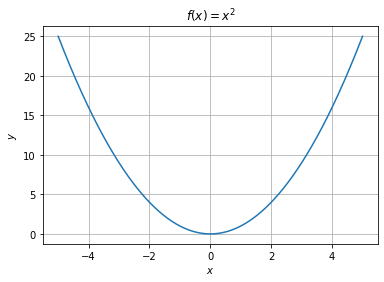

In [1]:
%matplotlib inline
import numpy as np

from tools.draw.math import plt_2d_functions
from tools.draw import math

plt_2d_functions([lambda x: x**2], np.arange(-5, 5+.01, .01),
                  title=f'$f(x)=x^2$', xlabel=r'$x$', ylabel=r'$y$')


Suppose we started from a random $x=22$. This strategy is called random initialization, and it generally tends to work well around x=(-1, 1).


According to our rule, $x := x - \eta \nabla x$. $\frac{d}{dx}x^2 = 2x$, our update rule becomes $x := x - \eta 2x$. Notice now the change from weight gradually changes depending on the rate of change of $x^2$. In our case, $x^2$ changes linearly to the degree of $x$.

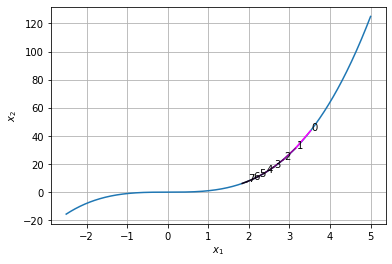

In [10]:
from tools.ml.draw.gradient_descent import gd2d_visual

# gd2d_visual((lambda x: x ** 2, lambda x: 2 * x), x_range=np.arange(-2.5, 5 + .01, .01), x_start=5, eta=.2)
# gd2d_visual((lambda x: x ** 2, lambda x: 2 * x), x_range=np.arange(-2.5, 5 + .01, .01), x_start=10, eta=.3) 
# gd2d_visual((lambda x: x ** 2, lambda x: 2 * x), x_range=np.arange(-2.5, 5 + .01, .01), x_start=10, eta=.7)       
# gd2d_visual((lambda x: x ** 2, lambda x: 2 * x), x_range=np.arange(-300, 300 + .1, .1), x_start=10, eta=1.1)
gd2d_visual((lambda x: x ** 3, lambda x: 3 * x ** 2), x_range=np.arange(-2.5, 5 + .01, .01), x_start=4, eta=.01, n_iter=10)

Here we observe that beginning from the same x location, the learning rate increases the rate of the convergance, but if it is too large, is can potentially overshoot the minimum and end up the other 'side' of the function. Given a large enough alpha, there is a possibility of no convergence at all. At the same time, even with a fixed learning rate we get a natural convergences towards the minimum. They reason why this happens has to do with the partial derivative of functions. If the rate of change is larger, the step will naturally, too be larger.

In general, we can observe how gradient descent is an iterative process that convergences towards the minimum of f(x, y), which in our example is 0.

And lastly, one thing to point out is that every step in the iterative process actually produces a set of weights that more performant than the previous ones. In this sense, we can imagine a gradual real-value estimation for the function of best fit.

### 2-Dimension + Local Minimum

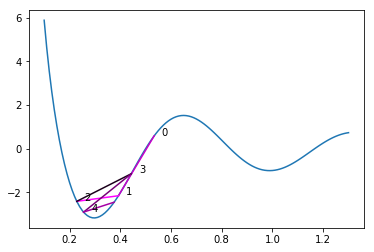

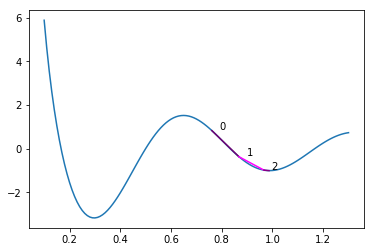

In [109]:
# \cos(3\pi x)/x
# -(3 π x sin(3 π x) + cos(3 π x))/x^2
from math import pi

gradient_descent.gd2D_visual(lambda x: np.cos(3*pi*x)/x, lambda x: -(3*pi*x*np.sin(3*pi*x) + np.cos(3*pi*x)) / x**2,
                             np.arange(.1, 1.3+.01, .01), x_start=.2, eta=.009, n_iter=7)
gradient_descent.gd2D_visual(lambda x: np.cos(3*pi*x)/x, lambda x: -(3*pi*x*np.sin(3*pi*x) + np.cos(3*pi*x)) / x**2,
                             np.arange(.1, 1.3+.01, .01), x_start=.7, eta=.01, n_iter=5)

The above plots demonstrate how with different random initializations, we can get a obtain different optimums with gradient descent.

### 3-Dimension


Now before we generalizes, let us consider a 2-dimensional input. Let $g(x)=xy^4+10$. Our update rule tells us that $w := w - \eta \nabla w$. And that x and y should change respectively by $\nabla f(x, y) = [\frac{d}{dx}f(x, y), \frac{d}{dy}f(x, y)] = [y^4, 4xy^3]$


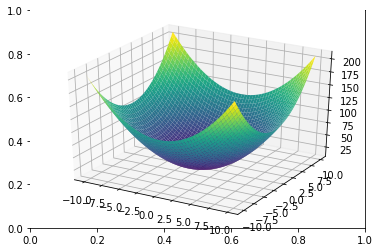

In [110]:
from myutils.draw.math import plt_3d_functions


ax = plt_3d_functions([lambda x, y: y**2 + x**2 + 10], 
                      np.arange(-10, 10, .05), 
                      np.arange(-10, 10, .05))

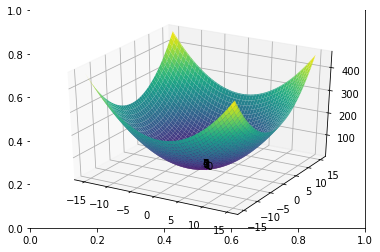

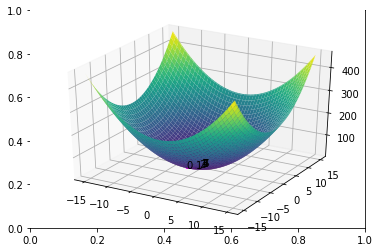

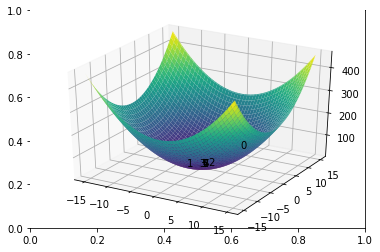

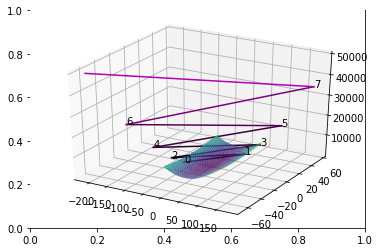

In [111]:
gradient_descent.gd3D_visual(lambda x, y: x**2 + y**2 + 10, [lambda x, y: 2*x, lambda x, y: 2*y], 
                             np.arange(-15, 15+.05, .05), np.arange(-15, 15+.05, .05), eta=.2, n_iter=10)
gradient_descent.gd3D_visual(lambda x, y: x**2 + y**2 + 10, [lambda x, y: 2*x, lambda x, y: 2*y], 
                             np.arange(-15, 15+.05, .05), np.arange(-15, 15+.05, .05), eta=.3, n_iter=10)
gradient_descent.gd3D_visual(lambda x, y: x**2 + y**2 + 10, [lambda x, y: 2*x, lambda x, y: 2*y], 
                             np.arange(-15, 15+.05, .05), np.arange(-15, 15+.05, .05), eta=.7, n_iter=10)
gradient_descent.gd3D_visual(lambda x, y: x**2 + y**2 + 10, [lambda x, y: 2*x, lambda x, y: 2*y], 
                             np.arange(-60, 80+.05, .05), np.arange(-40, 40+.05, .05), eta=1.1, n_iter=10)

The same take-aways can be said for a 3-dimensional gradient descent. Notice how the math is all jumbled and cluncky? This is why we invented vector algebra. We can speak in the same generalizations but in a cleaner and more efficient way. 


## Gradient Descent as Derivative Approximations

What if we have a scenario where our objective function is noncontinous? One approach would be to approximate the derivative diophantanically. For example, suppose we wanted to use gradient descent to determine what threshold value in the Blue spectrum (what specific value between 0 and 255) is optimal in order to seperate of classifiy the background from the foreground in this image.

Populating the interactive namespace from numpy and matplotlib


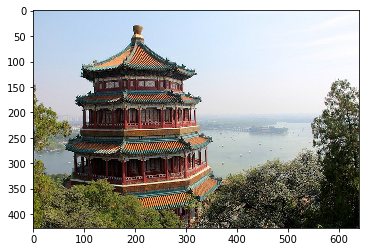

In [4]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from mltoolbox.config import config
from os.path import join

building_image = np.load(join(config['data_dir'], 'misc', 'building.npy'))
plt.imshow(building_image)

The first task would be to write an objective function which ultimately measures the performance of the classifier. In this case, we will take in some threshold and use that to count the number of misclassified instances.

In [5]:
perfect_classification = np.load(join(config['data_dir'], 'misc', 'perfect_classification.npy'))

def objective_function(p):
    building_temp = building_image.copy()
    building_temp[building_temp[:,:,2] > p] = 0
    building_temp = building_temp.astype(bool)
    building_temp = building_temp[:,:,0]
    building_temp = building_temp.reshape(perfect_classification.shape)
    # .equal returns 1 where the instances are correct so we flip all 1s and 0's to count the opposite
    return np.sum(~np.equal(building_temp, perfect_classification))

Next we'll need a way to know which direction to go and by how much. In the example, we could either increases or decrease tolerance on the blue alpha channel, and by what quantity should it be risen?

Heres where we approximate with the derivative. In general, $f'(x) = lim_{x \rightarrow \infty} \frac{f(x+h) - f(x)}{h}$. This is the slope, or rate of change of a function. We're taking a small step to the right, or $h$ direction. And we're seeing by how much the function responds with as a result, or $f(x+h)$. This gives us the ratio between the two axis. As rise over run.

Our objective function will do the same, but we'll be moving the smallest unit color channel-wise. If `objective_function(i+1) > objective_function(i-1)` then adding a color unit changes decreases the performance of the classifier. This also means that the ratio will be positive, and in general because we move in the direction opposite to that, we'll the next iterative the next optimal value will be smaller than the previous which makes sense because adding  (i+1) did the opposite of doing better. Additionally, if the objective function returns a higher ratio (e.g. i+1 did a lot more damage), then the multiplier will be naturally higher and the we'll skip more pixel intensities, if you will.

This is what makes this approach more optimal than simply checking for every pixel intensity and selecting the top performing one.

In [6]:
derivative = lambda i : (objective_function(i+1) - objective_function(i-1))/2

Next we perform our gradient descent algorithm and transition to the color that optimizes for minimum error.

In [7]:
from math import inf

def gradient_descent(x0, yk, tau):
    change_f_x = inf
    xk = x0
    
    while abs(change_f_x) > tau:
        change_f_x = derivative(xk)
        xk1 = xk - (yk * change_f_x)
        xk = xk1
    
    return int(xk)

optimal_value = gradient_descent(70, .005, 30)

The result.

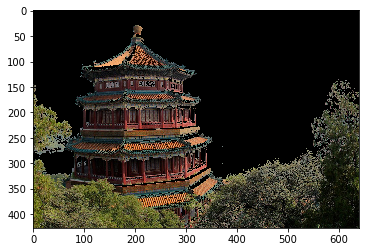

In [9]:
building_temp = building_image.copy()
building_temp[building_temp[:,:,2] > optimal_value] = 0
plt.imshow(building_temp)


# Gradient Descent in the Real World

**Problems**

What characterizes the shape of a loss function? Well, just like any function like $y(x) = x^2 + 3x - 9$ its the entire thing, learn weights and all. Not all loss functions are pretty, and in particular we ascribe a weight to every feature, then the dimensionality of the loss function increase linearly to this. _Depending_ on the loss function, there also may be hole, ridges, irregular terrains, or in otherwords a nonconvest function. All of this makes convergence difficult.

Gradient descent converges towards the closest local minimum, not the global minimum. This means that a different weight vector can get returned depending on the random seed. One second problem is that if you your alpha isn't large enough and the algorithm has a fixed number of epoches (e.g. stop iterating GD after 200 times), there is a possibility that your weight vector is just slowing descending some long base terrain.

**Resolutions**

Even ensure convergence, one thing we will want to make sure is for the features to share the same scale. Using sklearn's `StandardScaler`, we can achieve this. Why might this be? Well imagine for a second we have the function $f(x,y,z) = w_1x+w_2*y+w_3*z$. If $x$ operates on gallons, $y$ operates on kilo-gallons and $z$ operates in namometers, then the resulting loss function would skewed to these standards. As a result learning becomes more difficult.

There are different techniques used on top of the $\alpha$ term. Two of these include a technique known as early stopping and a learning schedule. They will be discussed later in this chapter.

## Gradient Descent of MSE

## TODO - Derive this by hand.

For the single case

$$\frac{\partial}{\partial w_j} MSE(w) = \frac{2}{m} \sum_{i=1}^m(w^Tx^{(i)}-y^{(i)})x_j^{(i)}$$


For everything

$$
  \begin{align}
    \nabla_w MSE(w) &= \begin{bmatrix}
            \frac{\partial}{\partial_{w_0}} MSE(w) \\
            \frac{\partial}{\partial_{w_1}} MSE(w)\\
            \vdots \\
            \frac{\partial}{\partial_{w_n}} MSE(w)
         \end{bmatrix} = \frac{2}{m}X^T(X*w - y)
  \end{align}
$$


## Gradient Descent in Logistic Regression

In logistic regression, we apply sigmoid function, in conjunction with loss function based on _MSE_. Fortunately the loss function (regardless on the dimensionality of the dataset) is convex. This means you can guarentee convergence towards a local minimum because in a convex function with the right learning rate and iteration count, if you pick any two points on the graph and draw a line segment is guarenteed to never cross the curve. This also means that whatever we are looking for will always be at the bottom of the bowl.



### Gradient of the Loss Function $J(w)$

Assume at this point that we have justified using the following loss function in the context of logistic regression. If you would like to see this evidence, see the chapter on [logistic regression](logistic_regression_path).

Our main goal at this point is to find the gradient of that loss so we can formulate our update rule for the weights. In other words, we want to gradually change $w$ in the correct direction every time so that we move closer and closer towards the minimum of the function.

$$\hat{y} = P(y=1|x) = \frac{1}{1 + exp(-x w^T)}$$

$$J(w) = \frac{1}{m} \sum_{i=1}^m -[(y^{(i)}log(\hat{y}(x^{(i)})) + (1-y^{(i)})log(\hat{y}(x^{(i)}))]$$


Our loss function is a composite function of two parts. We can begin by taking the derivative of $\hat{y}$.


\begin{align}
    \frac{\partial}{\partial w_j}\hat{y}(z) &= \frac{\partial}{\partial w_j} \frac{1}{1+e^{-z}} && \text{initialize} \\
    &= \dfrac{\partial}{\partial w_j} \left( 1 + e^{-z} \right)^{-1} && \text{inverse to apply the chain rule} \\
    &= -(1 + e^{-z})^{-2}(-\frac{\partial}{\partial w_j}(z) e^{-z}) \\
    &= \dfrac{e^{-z}\frac{\partial}{\partial w_j}(z)}{\left(1 + e^{-z}\right)^2} && \text{simplify} \\
    &= \dfrac{\frac{\partial}{\partial w_j}(z)}{1 + e^{-z}\ } \cdot \dfrac{e^{-z}}{1 + e^{-z}}  && \text{expand and mold} \\
    &= \dfrac{\frac{\partial}{\partial w_j}(z)}{1 + e^{-z}\ } \cdot \dfrac{(1 + e^{-z}) - 1}{1 + e^{-z}}  \\
    &= \dfrac{\frac{\partial}{\partial w_j}(z)}{1 + e^{-z}\ } \cdot \left( \dfrac{1 + e^{-z}}{1 + e^{-z}} - \dfrac{1}{1 + e^{-z}} \right) && \text{} \\
    &= \dfrac{\frac{\partial}{\partial w_j}(z)}{1 + e^{-z}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-z}} \right) && \text{} \\
    &= \hat{y}(z) \cdot (1 - \hat{y}(z)) \cdot \frac{\partial}{\partial w_j}(z) && \text{resubstitute}
\end{align}



Next, the derivative of a _single_ sample cost $J(w)$. We can later generalize this for all the samples since the derivative of the sums are the sums of the derivatives. In other words, $\frac{d}{dx} \sum f(x)= \sum \frac{d}{dx}f(x)$

Partial derivative of the cost function with respect to every weight.

\begin{align}
    \frac{\partial}{\partial w_j}J(w) &= -y \dfrac{\partial}{\partial w_j} log(\hat{y}(z)) + (1-y) \dfrac{\partial}{\partial w_j} log(1-\hat{y}(z)) && \text{initialize; derivative of sums} \\
    &= [-y \frac{1}{\hat{y}(z)} + (1-y) \frac{1}{1-\hat{y}(z)}] \frac{\partial}{\partial w_j} \hat{y}(z) && \text{derivative of logs; chain rule} \\
    &= [-y \frac{1}{\hat{y}(z)} + (1-y) \frac{1}{1-\hat{y}(z)}] \hat{y}(z)(1-\hat{y}(z)) \dfrac{\partial}{\partial w_j} && \text{substitution} \\
    &= [\frac{-y (\hat{y}(z)) (1-\hat{y}(z))}{\hat{y}(z)} + \frac{(1-y) (\hat{y}(z)) (1-\hat{y}(z))}{(1-\hat{y}(z))}] \cdot \frac{\partial}{\partial w_j} z && \text{distribute} \\
    &= [-y (1-\hat{y}(z)) + (1-y) (\hat{y}(z))] \cdot \frac{\partial}{\partial w_j} z && \text{simplify; cancel} \\ 
    &= [(-y + y(\hat{y}(z))) + \hat{y}(z) - y(\hat{y}(z))] \cdot \frac{\partial}{\partial w_j} z && \text{distribute} \\
    &= (-y + \hat{y}(z)) \cdot \frac{\partial}{\partial w_j} z
\end{align}

And now the composition of the weights and features. As a reminder, the weights are variable, and $x$ comes from a sample and are therefore constant. As a result the derivative takes a very simple composition.

\begin{align}
    z &= w_0 + x_1 w_1 + x_2 w_2 + x_3 w_3 + \dots + x_n w_n \\
    &= \sum_{j=0}^n x_j w_j \\
    &= x w^T \\
    \frac{\partial}{\partial w_j} z &= \frac{\partial}{\partial w_j} (x w^T) \\
    &= x_j
\end{align}

Now $\frac{\partial}{\partial w_j}J(w)$ finally simplifies to $(-y + \hat{y}(z)) \cdot x_j$


## [TODO] 3d plot gradient descent for logistic regression in the 2 dimensional setting, and go through a complete example with sample data.


## Batch Gradient Descent

In _batch gradient descent_, a single iteration of gradient descent requires us to iterate through all the training samples and then average all of the weights in order to then move down in that gradient direction.

This carries a time complexity of $O(n*m)$ where n is the number of size of the dataset and m is the number of rows. The advantage of this approach is that as we approach a local minimum, it will always converage to this point because the algorithm is using all the information is can. The main disadvantage is that its memory intensive, inefficient and can get stuck into a local minimum (more on this later with stochastic GD).

What if we can find a way to cut down the computational complexity without must loss to the models performance?


**Batch Gradient Descent Algorithm**

In [112]:
def batch_GD(X, y, n_features, n_iterations, seed=42, loss='MSE', eta=.01):
    np.random.seed(seed)
    weight_path = []
    
    t0, t1 = 5, 50
    def learning_schedule(t):
        return t0 / (t + t1)
    
    # +1 for bias term
    weights = np.random.randn(n_features + 1, 1)
    m = len(X)

    t = 0
    for it in range(n_iterations):
        t += 1
        gradients = 2 / m * X.T.dot(X.dot(weights) - y)
        eta = learning_schedule(t)
        weights = weights - eta * gradients
        weight_path.append(weights)

    return weight_path

## Mini Batch Gradient Descent

There is also the version of batch GD where rather than looking at the entire training set as a whole to make a decision, a random subset of the training instances are used. While, mini batch GD is still prone to get stuck at local minima and only can only approximate the it, this happens to a smaller extend. The primary advantage is a boost in efficiency. And to offset some of its disadvantages, we can use several strategies on top on the minibatch algorithm such as a learning schedule.

The main idea is to utilize the fact that training instances can be similiar in the sense that if we take a random sample it would be representative of the whole dataset (to some degree). In this way, the random sample itself can be used to make a decision as to update the weights. 

**Mini Batch Algorithm**

In [113]:
def mini_batch_GD(X, y, n_features, n_iterations=20, minibatch_size=10, seed=42, loss='MSE'):
    np.random.seed(seed)
    weight_path = []
    
    # random weight init
    weights = np.random.randn(n_features + 1,1)
    m = len(X)

    # learning schedule for variable learning rate
    t0, t1 = 200, 1000
    def learning_schedule(t):
        return t0 / (t + t1)

    t = 0
    for epoch in range(n_iterations):
        # shuffle each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # split the entire training set into batches, this way we only do
        # int(m / minibatch_size) amount of iterations
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            # assume linear regression mse loss function
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(weights) - yi)
            eta = learning_schedule(t)
            weights = weights - eta * gradients
            # track the change in the weights
            weight_path.append(weights)
    return weight_path

## Stochastic Gradient Descent

With stochastic gradient descent a single training example is consumed to make a gradient descent. In otherwords, rather than iterating through every training example, and then computing the average, you take only a single example to make a descent. The primary advantage here is a boost in speed with a fractual loss in accuracy. The boost in speed does not just come from computing the gradient of few training instances. From a hardware perpective, a single batch or iteration can be computed in memory without any issue.

My professor gave this analogy which really stuck with me: Suppose you are in a robot who is in a classroom and you goal is to make it to the exit. With regular gradient descent, this robot will asks everyone in the room which direction to move in. The robot continues to do this, moving in the average direction the students tell him to move in, until it reaches the exit. In stochastic gradient descent, the robot iterates through every student in the classroom, asking what direction to move in. The robot moves exactly way the students tell it to move in. Once the final student tells him where to go, one "iteration" of the algorithm finishes.

Another added benefit is that in due to the nature of a stochastic process being more irregular, it as a result has a higher probability of jumping out of a local minimum and get trapped under a global minimum. So in this sense, it can improve the accuracy of the algorithm as a whole. At the same time, because of this very fact, the stochastic process cannot settled on a minimum when it does find one. This is because while the cost function is evaluated on the basis of the entire dataset as a whole, using a subset of the data to make an evaulation, it faces a different perspective of what that minimum is. One strategy (_simulated annealing_) to reduce the irregularity is to have a variable learning rate (_learning schedule_) that decreases the more iterations into the descent. In this way, less progress is made towards the end (where it is likely already near the minimum), for a more accurate convergence.


**Sample learning schedule $f(t) = \frac{t_0}{t + t_1}$**


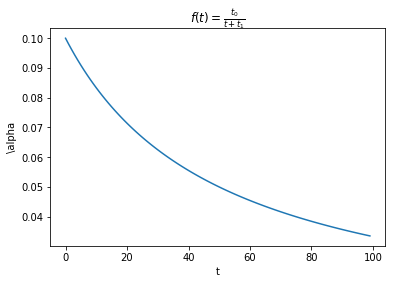

In [114]:
from myutils.draw.math import plt_2d_functions

t0, t1 = 5, 50
plt_2d_functions([lambda t : t0 / (t + t1)], x=np.arange(0, 100), 
                  title=r'$f(t) = \frac{t_0}{t + t_1}$', xlabel='t', ylabel=r'\alpha')

**Stochastic Gradient Descent Algorithm with Simulated Annealing**


In [115]:
def stochastic_GD(X, y, n_features, n_iterations=20, seed=42, loss='MSE'):
    np.random.seed(seed)
    weight_path = []
    
    # learning schedule hyperparameters
    t0, t1 = 5, 50
    def learning_schedule(t):
        return t0 / (t + t1)
    m = len(X)

    # random weight initialization
    weights = np.random.randn(n_features + 1,1)

    # descent `n_epochs`
    for epoch in range(n_iterations):
        # select `m` random points in the dataset that point which direction to move in
        # note: this technique includes the chances of picking the same data point
        #       to avoid this, we can shuffle the dataset and iterate over it; shuffling
        #       at every point when we've iterated through the complete dataset
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(weights) - yi)
            eta = learning_schedule(epoch * m + i)
            weights = weights - eta * gradients
            weight_path.append(weights)
    return weight_path

**Comparison of Time Complexities**

Let:
* `m` = size of the dataset
* `b` = mini batch size
* `i` = number of iterations (hyper parameter)


* Batch $O(i*m)$
* Mini Batch $O(i*m/b)$
* Stochastic $O(i*m)$

It is important to note that these algorithms have different rate of convergences. In practice stochastic GD tends to be the fastest.


**Visualization of Learning Convergences**

If we were to illustrate and trace how each step in the process looks like, regular gradient descent with a small enough learning rate would look like a ball rolling down a hill, always moving in the direction of least resistance, while stochastic gradient descent would look more like a drunken walk, with a lot less regularity towards the minimum. 

In [116]:
import matplotlib.pyplot as plt


# create random sample data
X = 2 * np.random.rand(100, 1)
X_bias = np.c_[np.ones((100, 1)), X]
y = 4 + 3 * X + np.random.randn(100, 1)

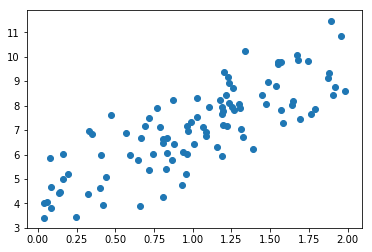

In [117]:
plt.scatter(X, y)

In [118]:
batch_w_path = batch_GD(X_bias, y, 1, n_iterations=60)
minibatch_w_path = mini_batch_GD(X_bias, y, 1)
stochastic_w_path = stochastic_GD(X_bias, y, 1)

# flatten list into (len(X), 2) column vector
batch_w_path = np.array([[w[0][0], w[1][0]] for w in batch_w_path])
minibatch_w_path = np.array([[w[0][0], w[1][0]] for w in minibatch_w_path])
stochastic_w_path = np.array([[w[0][0], w[1][0]] for w in stochastic_w_path])

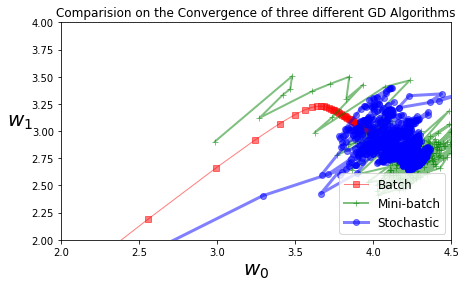

In [119]:
# plot how weight 1 changes along with weight 2
plt.figure(figsize=(7,4))
plt.plot(batch_w_path[:, 0], batch_w_path[:, 1], "r-s", linewidth=1, label="Batch", alpha=.5)
plt.plot(minibatch_w_path[:, 0], minibatch_w_path[:, 1], "g-+", linewidth=2, label="Mini-batch", alpha=.5)
plt.plot(stochastic_w_path[:, 0], stochastic_w_path[:, 1], "b-o", linewidth=3, label="Stochastic", alpha=.5)
plt.legend(fontsize=12, loc='lower right')
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.title("Comparision on the Convergence of three different GD Algorithms")
plt.axis([2.0, 4.5, 2.0, 4.0])
plt.show()

Notice how the stochastic process jumps all over the place (blue) and how mini-batch (green) has difficulties "finding" the minimum. All 3 algorithms converge to the same relative location.

**Summary of GD Algorithms**

| Algorithm       |  Large m |  Out-of-core support |  Large n |  Scaling required |  Scikit-Learn     | 
|-----------------|----------|----------------------|----------|-------------------|-------------------| 
| Normal Equation |  Fast    |  No                  |  Slow    |  No               |  LinearRegression | 
| Batch GD        |  Slow    |  No                  |  Fast    |  Yes              |  n/a              | 
| Stochastic GD   |  Fast    |  Yes                 |  Fast    |  Yes              |  SGDRegressor     | 
| Mini-batch GD   |  Fast    |  Yes                 |  Fast    |  Yes              |  n/a              | 


## Additional Regularization Techniques

### Early Stopping

One way of avoid overfitting is to stop training via gradient descent as soon as the validation error reached a minimum. This technique is known as early stopping. 

Early stopping can be implemented by hand, trivially. Thankfully, Sklearn has this feature built in `SGDRegressor`. Previously, `n_iter` was specified as the number of passes over the training data, so the process would have looked like training for 1 epoch at a time for a certain period until `mean_squared_error` was minimized.

Instead we can specified the maximum number of epochs the regressor will train for via `max_iter`. Additionally, the `tol` could be specified as a stopping criterion. If `tol` is set to `None`, the regressor will stop until `(loss > previous_loss - tol)` where `tol=1e-3)`.
